In [2]:
import functions
import os
import random
import shutil
import numpy as np
from PIL import Image
import timeit
import itertools
import cv2
from matplotlib import pyplot as plt

First we import the data into a dictionary that contains all the grayscale values of our images

In [24]:
numbers_library = functions.get_cv_array_from_images('../images_no_copies')

Test


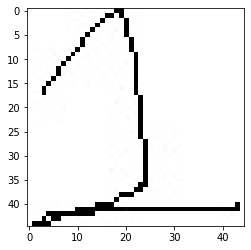

In [25]:
test = numbers_library['1'][7]
plt.imshow(test)
plt.show()

In [26]:
print(functions.getList(numbers_library)) 

dict_keys(['+', '9', '6', 'div', '1', '5', '8', '7', '0', '2', '3', 'times', '-', '4'])


In [28]:
numsKeys = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
oprKeys = ["+", "-", "div", "times"]
filterByKey = lambda keys: {x: numbers_library[x] for x in keys}
nums = filterByKey(numsKeys)
opr = filterByKey(oprKeys)
print(opr.keys())


dict_keys(['+', '-', 'div', 'times'])


In [37]:
def generate_image(symbols):
    # height of characters is 45. lets place each in a 80 by 80 box with 1 empty line in between
    img_size = 45
    img_target_size = 80
    n_symbols = len(symbols)
    COLOR_WHITE = (255,255,255)

    symbols_rand_pos = []
    for symbol in symbols:
        left_border = random.choice(range(img_target_size - img_size + 1))
        top_border = random.choice(range(img_target_size - img_size + 1)) # 0...35
        right_border = img_target_size - img_size - left_border
        bottom_border = img_target_size - img_size - top_border
        #print(symbol)
        img = cv2.copyMakeBorder(
            symbol, 
            top_border, bottom_border, left_border, right_border + 1, # so we get one white line between each img 
            cv2.BORDER_CONSTANT, None, COLOR_WHITE)
        
        symbols_rand_pos.append(img)

    return np.concatenate(symbols_rand_pos, axis=1)
    

5+3


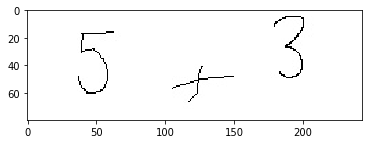

In [42]:
symbols = ["5", "+", "3"]
equ_name = "".join(symbols)
print(equ_name)
path = ""+ root + "/../complex_img/" + equ_name
#Check if the directory already exists
if os.path.exists(path):    
    #print ("Directory %s replaced" % path)
    shutil.rmtree(path)
os.makedirs(path)
#create a series of random images for training
for i in range(10): 
    selected_syms = [random.choice(numbers_library[sym_name]) for sym_name in symbols]    
    eqn = generate_image(selected_syms)
    plt.imshow(eqn)
    
    cv2.imwrite(path+"/"+str(i)+".png", eqn)
    break
plt.show()

In [39]:
################## Using itertools
start = timeit.default_timer()
root = os.getcwd()
for symbols in itertools.product(nums,opr,nums):
    equ_name = "".join(symbols)
    print(equ_name)
    path = ""+ root + "/../complex_img/" + equ_name
    #Check if the directory already exists
    if os.path.exists(path):    
        #print ("Directory %s replaced" % path)
        shutil.rmtree(path)
    os.makedirs(path)
    #create a series of random images for training
    for i in range(10): 
        selected_syms = [random.choice(numbers_library[sym_name]) for sym_name in symbols]    
        eqn = generate_image(selected_syms)


        cv2.imwrite(path+"/"+str(i)+".png", eqn)
stop = timeit.default_timer()
print('Time: '+ str(stop-start))

#9.85 sec 2nd method


0+0
0+1
0+2
0+3
0+4
0+5
0+6
0+7
0+8
0+9
0-0
0-1
0-2
0-3
0-4
0-5
0-6
0-7
0-8
0-9
0div0
0div1
0div2
0div3
0div4
0div5
0div6
0div7
0div8
0div9
0times0
0times1
0times2
0times3
0times4
0times5
0times6
0times7
0times8
0times9
1+0
1+1
1+2
1+3
1+4
1+5
1+6
1+7
1+8
1+9
1-0
1-1
1-2
1-3
1-4
1-5
1-6
1-7
1-8
1-9
1div0
1div1
1div2
1div3
1div4
1div5
1div6
1div7
1div8
1div9
1times0
1times1
1times2
1times3
1times4
1times5
1times6
1times7
1times8
1times9
2+0
2+1
2+2
2+3
2+4
2+5
2+6
2+7
2+8
2+9
2-0
2-1
2-2
2-3
2-4
2-5
2-6
2-7
2-8
2-9
2div0
2div1
2div2
2div3
2div4
2div5
2div6
2div7
2div8
2div9
2times0
2times1
2times2
2times3
2times4
2times5
2times6
2times7
2times8
2times9
3+0
3+1
3+2
3+3
3+4
3+5
3+6
3+7
3+8
3+9
3-0
3-1
3-2
3-3
3-4
3-5
3-6
3-7
3-8
3-9
3div0
3div1
3div2
3div3
3div4
3div5
3div6
3div7
3div8
3div9
3times0
3times1
3times2
3times3
3times4
3times5
3times6
3times7
3times8
3times9
4+0
4+1
4+2
4+3
4+4
4+5
4+6
4+7
4+8
4+9
4-0
4-1
4-2
4-3
4-4
4-5
4-6
4-7
4-8
4-9
4div0
4div1
4div2
4div3
4div4
4div5
4div

In [11]:
############## Get all the current images into the library
numbers_library.update(functions.get_array_from_images('../generated_images'))

Test


In [7]:
test2 = numbers_library['0times0'][6]
print(test2.shape)
print(test2)

img2 = Image.fromarray(test2, "L" )
img2.save("x.png")

KeyError: '0times0'

In [6]:
print('All the different symbols and equations are: \n\n'+ str(functions.getList(numbers_library)) )

All the different symbols and equations are: 

dict_keys(['div', 'times', '9', '0', '7', '+', '6', '1', '8', '-', '4', '3', '2', '5'])


In [18]:
import pandas as pd

In [8]:
######### Save into a .csv file of 2D entries
(pd.DataFrame.from_dict(data=numbers_library, orient='index')
   .to_csv('dict_file.csv', header=False))

In [8]:
import csv

In [30]:
colNames = ["pixel" + str(i+1) for i in range(len(numbers_library['1'][1].flatten()))]
colNames.insert(0,'Symbol')

In [32]:
#make new csv file
with open('good.csv','w') as fd:
    writer = csv.writer(fd)
    writer.writerow(colNames)

# Add all the arrays into the csv
for symbols in numbers_library:
    #for arrays in range(symbols):
    for array in range(len(numbers_library[symbols])):
        a = np.array(numbers_library[symbols][array])
        a = list(a.flatten())
        a.insert(0,symbols)
        #print("Symbol " + str(symbols) + ":    \t" + str(a))
        with open('good.csv','a') as fd:
            writer = csv.writer(fd)
            writer.writerow(a)

In [33]:
df = pd.read_csv('good.csv')
print(df)

Symbol  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0        div     255     255     255     255     255     255     255     255   
1        div     255     255     255     255     255     255     255     255   
2        div     255     255     255     255     255     255     255     255   
3        div     255     255     255     255     255     255     255     255   
4        div     255     255     255     255     255     255     255     255   
5        div     255     255     255     255     255     255     255     255   
6        div     255     255     255     255     255     255     255     255   
7        div     255     255     255     255     255     255     255     255   
8        div     255     255     255     255     255     255     255     255   
9        div     255     255     255     255     255     255     255     255   
10       div     255     255     255     255     255     255     255     255   
11       div     255     255     255     255  